# Objective 01 - Implement a train-validate-test split


In [5]:
# import numpy and seaborn
import numpy as np
import seaborn as sns
# load dataset
iris = sns.load_dataset('iris')

display(iris.head())

x= iris['petal_width']
X = x[:,np.newaxis]
y = iris['petal_length']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


In [8]:
# import the train_test_split utility
from sklearn.model_selection import train_test_split

#create the "remaining "(include train and val dataset) and test dataset
X_remain, X_test, y_remain, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [10]:
# create the train and validatation datasets
X_train, X_val, y_train, y_val = train_test_split(X_remain,y_remain, test_size = 0.25, random_state = 42)

# print out the sizes of train, validate and test datasets
print('Training data set samples:', len(X_train))
print('Validation data set samples:', len(X_val))
print('Test data set samples:', len(X_test))

Training data set samples: 90
Validation data set samples: 30
Test data set samples: 30


In [15]:
# FIT AND EVALUATE HERE

# import the libraries
from sklearn.linear_model import LinearRegression

#instantiate the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# use the VALIDATION set for predictions
y_predict = model.predict(X_val)

# Calculate the accuracy scores
from sklearn.metrics import r2_score
r2_score(y_val, y_predict)


0.9589442606386026

## Any changes to the hyperparameters must be done before proceeding to the next stage

In [20]:
# use the TEST set for prediction
y_predict_test = model.predict(X_test)
r2_score(y_test, y_predict_test)

0.9287783612248339

# Objective 02 - Begin with baselines for classification


In [23]:
# import numpy and seaborn
import numpy as np
import seaborn as sns

# load dataset
geyser = sns.load_dataset('geyser')
display(geyser.head())

display(geyser.describe())

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


,duration,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [26]:
# find the number of counts for each type of eruptions
geyser['kind'].value_counts(normalize = True)

long     0.632353
short    0.367647
Name: kind, dtype: float64

In [ ]:
# so from previous we have a baseline to have long as it is the most common tyupe 

# Objective 03 - Express and explain the intuition and interpretation of logistic regression


In [28]:
# the logistics signmoid function (implelemnted to accept numpy arrays)

import numpy as np

def sigmoid(x):
  return 1/(1+(np.e**-x))

Text(0.5, 1.0, 'Sigmoid function')

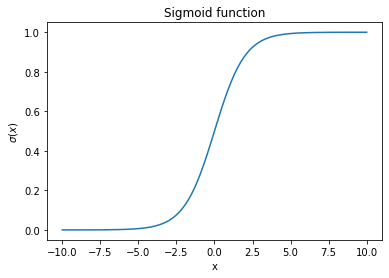

In [32]:
# plot the function
x_plot = np.linspace(-10, 10, 100)
sig_y = sigmoid(x_plot)

#import the plotting fuction
import matplotlib.pyplot as plt

# plot the function generated above
plt.plot(x_plot, sig_y)
plt.xlabel('x'); plt.ylabel('$\sigma(x)$')
plt.title('Sigmoid function')


In [37]:
# choose the features we ll use the duration

x = geyser['duration']

#import the label encoder and encode the 'kind' column
from sklearn.preprocessing import LabelEncoder
# LabelEncoder Encode target labels with value between 0 and n_classes-1 from docstring
# instantiate the class
le = LabelEncoder()

# create the new column with 0 = long and 1 = short class labels

geyser['kind_binary'] = le.fit_transform(geyser['kind']) # fitting and transforming as the same time 
display(geyser.head())

# assign the target variable to y
y = geyser['kind_binary']



,duration,waiting,kind,kind_binary
0,3.600,79,long,0
1,1.800,54,short,1
2,3.333,74,long,0
3,2.283,62,short,1
4,4.533,85,long,0


Text(0.5, 1.0, 'Geyser duration')

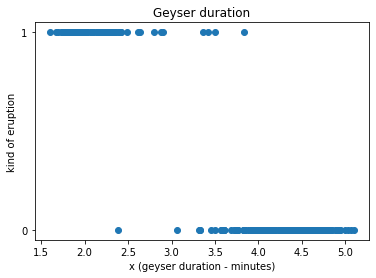

In [39]:
# Plot the data for 'duration'
plt.scatter(x, y)
plt.yticks([0, 1])
plt.xlabel('x (geyser duration - minutes)'); plt.ylabel('kind of eruption')
plt.title('Geyser duration')


Text(0.5, 1.0, 'Geyser eruption with model')

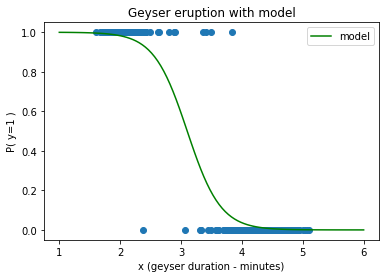

In [45]:
# assign the coefficient fgrom previously fit model
beta_0 = 11.32
beta_1 = -3.65

# define the sigmoid with coefficients
def sigmoid_beta(x, beta_0, beta_1):
  exp = beta_0 + beta_1*x
  return 1/(1+ np.e**(-exp))
x_model_plot = np.linspace(1,6,100)
y_model = sigmoid_beta(x_model_plot, beta_0, beta_1)

# Plot the function generated above
plt.scatter(x, y)
plt.plot(x_model_plot, y_model, color='green', label='model')
plt.xlabel('x (geyser duration - minutes)'); plt.ylabel('P( y=1 )')
plt.legend()
plt.title('Geyser eruption with model')